# Advertising - Multiple Linear Regression

We have a dataset with sales figures based on TV, radio, and newspaper ads. We are looking to answer the question of how much sales will increase if we invest separately in TV, radio, and newspaper. Additionally, we will determine which advertising method is more effective.

<img src="https://exchange4media.gumlet.io/news-photo/112186-tam.jpg?w=500" >

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

import matplotlib.pyplot as plt

### Import Dataset

In [2]:
df=pd.read_csv('advertising.csv')

### EDA and Data Visualization

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

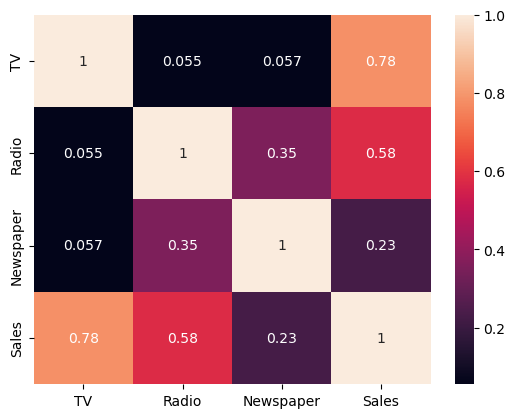

In [8]:
sns.heatmap(df.corr(),annot=True)

We can get that TV is the best advertising method according to others.

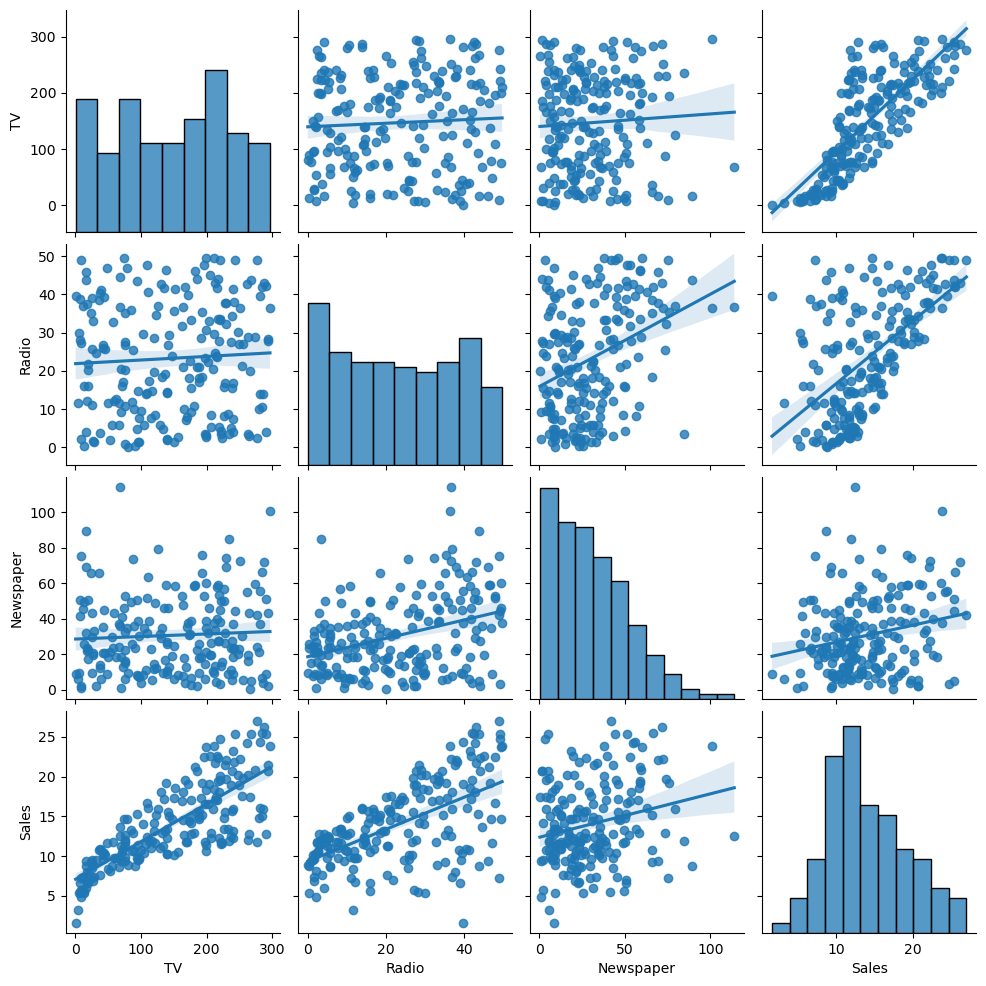

In [9]:
sns.pairplot(df, kind="reg");

### Regression

Let's determine our x and y values

In [10]:
x = df.drop(['Sales'],axis=1)
y = df["Sales"]

We will use algo test algorithm and apply various regression library to the data and we will find which library give us the best score.

In [11]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #I define all models
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #I create a dataframe to tabulate the error and accuracy rates
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #I place my accuracy and error rates in the table named result
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #sorts and returns the result table I created according to the accuracy rate (r2_score)
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [12]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,9.834093e-01,7.236454e-01,6.167353e-01
XGBRegressor,9.724704e-01,9.321655e-01,7.258288e-01
KNeighborsRegressor,9.659018e-01,1.037431e+00,8.654691e-01
Decision Tree,9.516056e-01,1.235921e+00,8.900000e-01
Extra Tree,9.367705e-01,1.412710e+00,1.072500e+00
AdaBoost,9.106204e-01,1.679625e+00,1.189000e+00
Lasso,9.004013e-01,1.773046e+00,1.452202e+00
ElasticNet,8.999612e-01,1.776959e+00,1.456659e+00
Ridge,8.994381e-01,1.781599e+00,1.460766e+00
Linear,8.994380e-01,1.781600e+00,1.460757e+00


We find that Gradient Boosting	give us the best score.

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [16]:
GBR=GradientBoostingRegressor()

In [21]:
GBR_model=GBR.fit(x_train,y_train)

In [22]:
y_pred=GBR_model.predict(x_test)

In [23]:
r2_score(y_test,y_pred)

0.9834833699558406

<Axes: ylabel='Sales'>

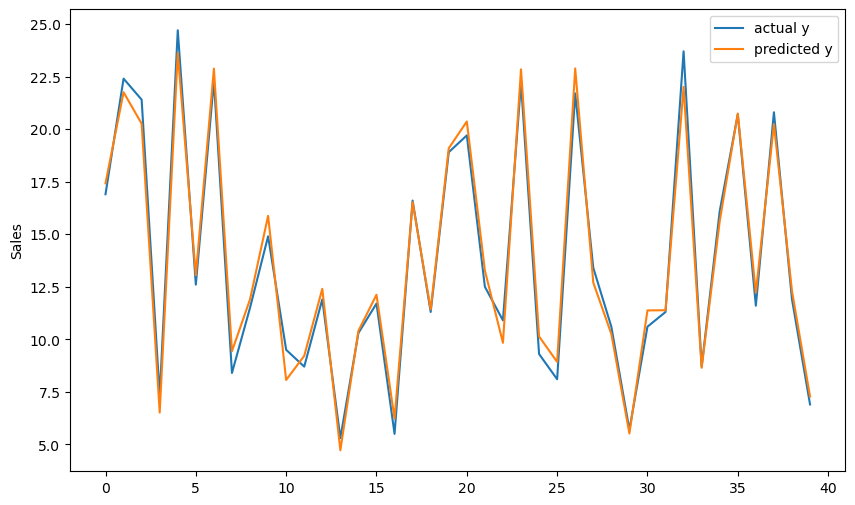

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test)),y=y_test, label="actual y")
sns.lineplot(x=range(len(y_test)),y=y_pred, label="predicted y")

### Feature Importance

Now, we will show which one is the best.

In [32]:
GBR.feature_importances_

array([0.61262214, 0.38092703, 0.00645083])

In [36]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':GBR.feature_importances_})

In [37]:
feature_importance

,Feature,Coefs
0,TV,0.612622
1,Radio,0.380927
2,Newspaper,0.006451


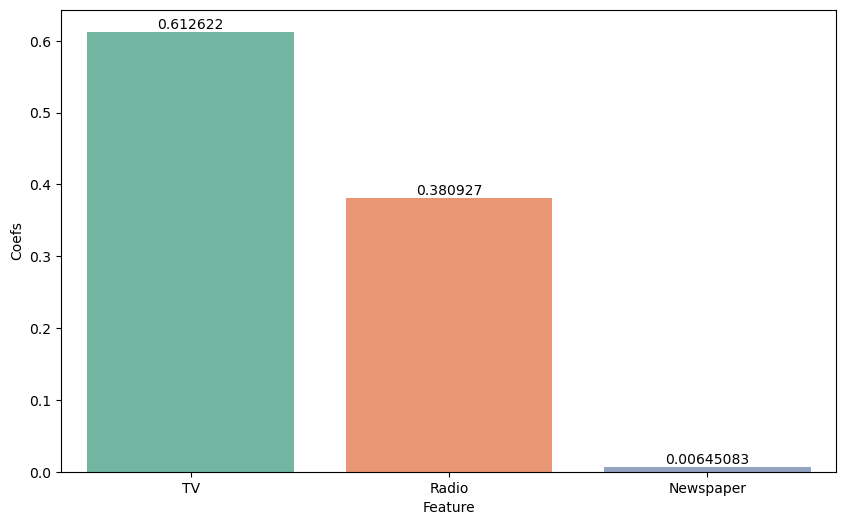

In [58]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Feature', y='Coefs', data=feature_importance, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)

### Test GBR Model

Now, we will predict Sales with our model.

In [84]:
test=pd.DataFrame({
    'TV':[100],
    'Radio':[50],
    'Newspaper':[50]
})

In [85]:
GBR_model.predict(test)

array([15.30220991])

### Conclusion

We have a dataset with sales figures based on TV, radio, and newspaper advertisements. We read the dataset using the pandas library. We found the correlation between sales figures and advertising media and generated a heatmap to visualize this correlation. Based on this, we prioritized the importance of the media as TV, Radio, and Newspaper. We then split our data into 80% training and 20% testing. We used 14 different regression libraries to create 14 different regression models. The most successful model was created using Gradient Boosting, achieving a 98% R2 Score. We determined the feature importance, which supported the results from our correlation analysis. Accordingly, advertisements on TV have a 61% impact on sales figures, radio advertisements have a 38% impact, and newspaper advertisements have a 0.6% impact. Our trained model predicts the sales figures when we input new investment numbers for these advertising media.